# Interpretation

In [97]:
import numpy as np
import nifits
import nifits.io.oifits as io
import nifits.backend as be
import nifits.extra as extra

import matplotlib.pyplot as plt
import astropy.units as units

new_nifits = io.nifits.from_nifits("/home/romain/Downloads/data_life2_fund_dt600s_ttot200000s_truecov (1).nifits")
# new_nifits = io.nifits.from_nifits("nott_test_05_planet_noat.nifits")
oldbe = be.NI_Backend(new_nifits)
oldbe.create_fov_function_all()
abe = extra.Post(new_nifits)
abe.create_fov_function_all()
abe.create_whitening_matrix(replace=False)
# extra.Post.wget_all_outs = extra..whitened_outputs(extra.Post.get_all_outs)

Missing OI_ARRAY
Missing NI_DSAMP
Missing NI_OSWAVELENGTH
Missing NI_IOTAGS
Checking header True
contains_header: True


/home/romain/Documents/hi5/aiitec/nifits/nifits/nifits/io/oifits.py:73: UserWarning: Keyword deprecation. Expected `NIFITS FOV_MODE` (`HIERARCH` keyword)
 Found `FOV_MODE`
 This file was generated for NIFITS standard version <= 0.2. It will stop working for library versions >= 0.1.0 .
  warnings.warn(f"Keyword deprecation. Expected `{args[1]}` (`HIERARCH` keyword)\n Found `{mykw}`\n This file was generated for NIFITS standard version <= 0.2. It will stop working for library versions >= 0.1.0 .")
/home/romain/Documents/hi5/aiitec/nifits/nifits/nifits/io/oifits.py:73: UserWarning: Keyword deprecation. Expected `NIFITS FOV_TELDIAM` (`HIERARCH` keyword)
 Found `FOV_TELDIAM`
 This file was generated for NIFITS standard version <= 0.2. It will stop working for library versions >= 0.1.0 .
  warnings.warn(f"Keyword deprecation. Expected `{args[1]}` (`HIERARCH` keyword)\n Found `{mykw}`\n This file was generated for NIFITS standard version <= 0.2. It will stop working for library versions >= 0.

In [98]:
%%time
acollec = be.PointCollection.from_uniform_disk(250., 1000,)
z_w = abe.w_get_all_outs(*acollec.coords_rad, kernels=True)

CPU times: user 2.39 s, sys: 2.67 s, total: 5.06 s
Wall time: 5.37 s


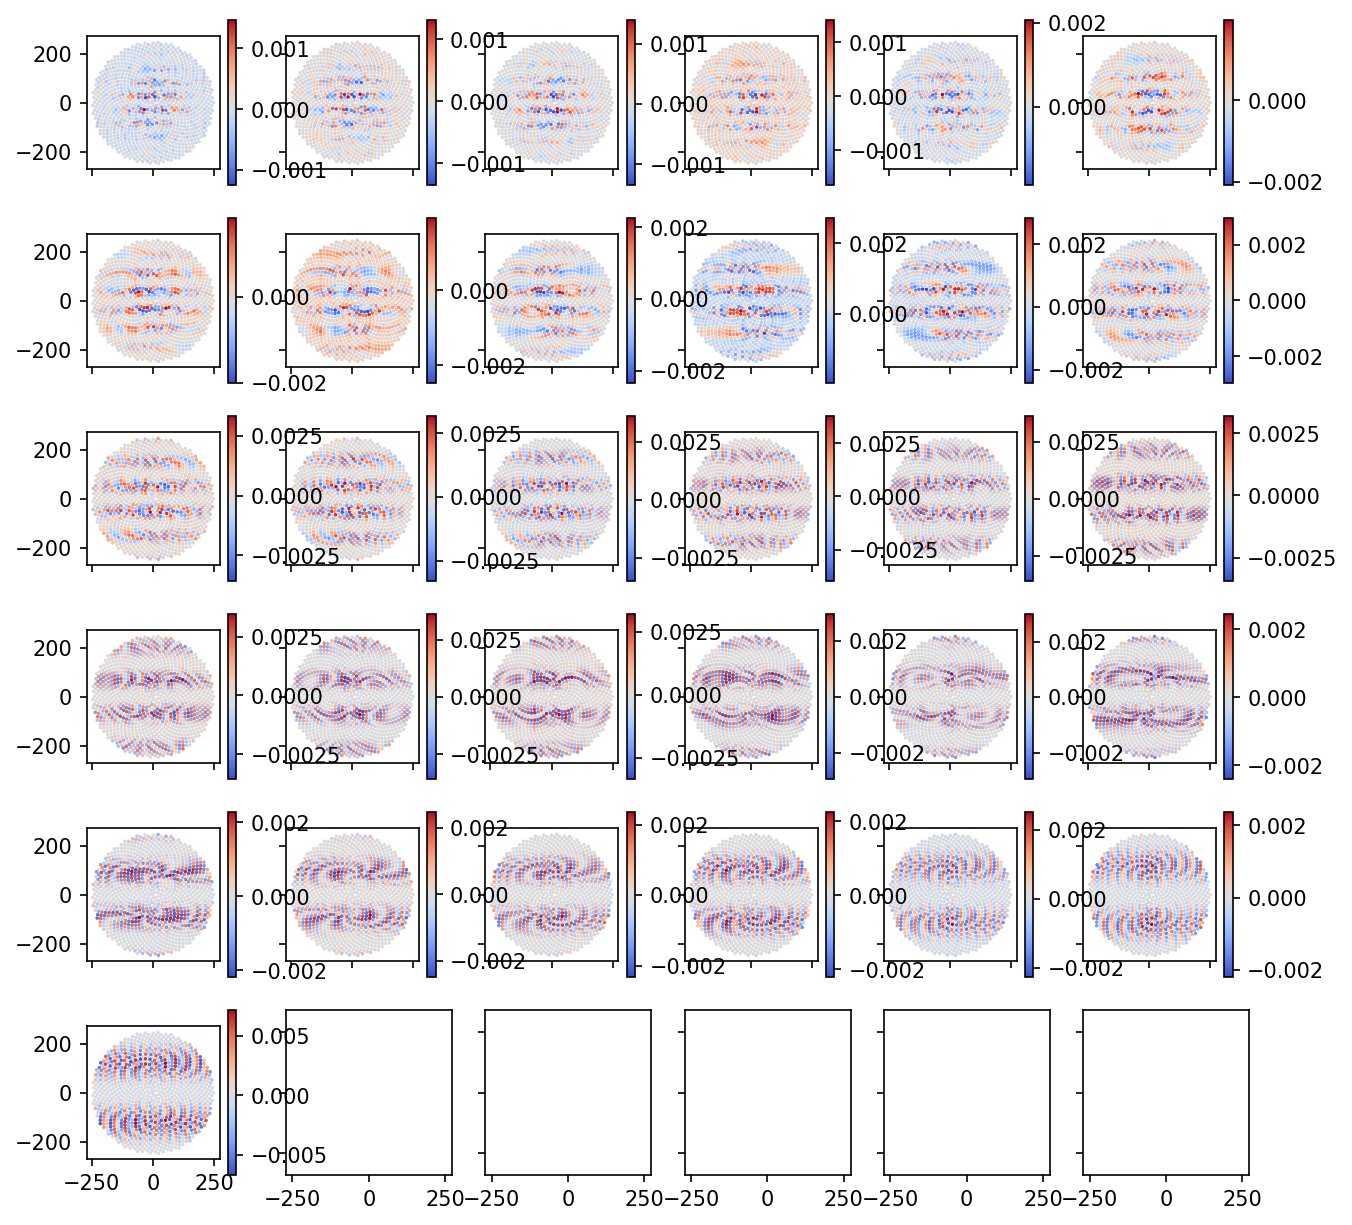

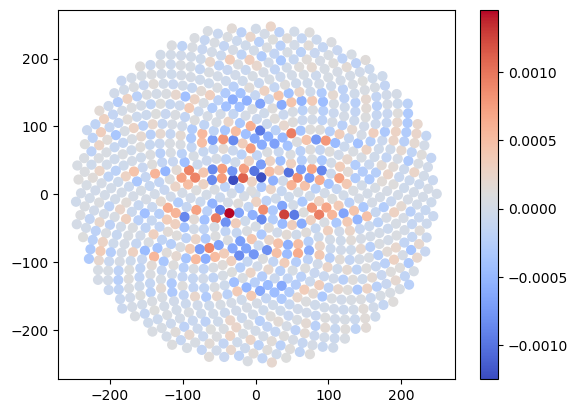

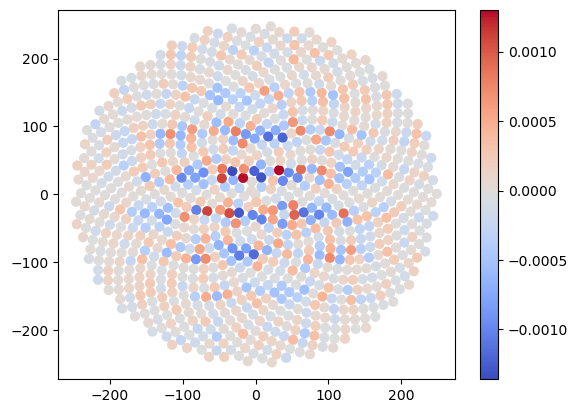

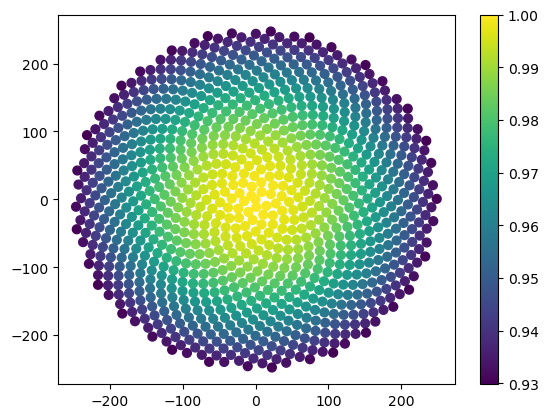

0.007161300552063354


In [99]:
nwl = len(abe.nifits.oi_wavelength.lambs)
fig, axs = plt.subplots(nwl//5,5+1, figsize=(10,10), sharex=True, sharey=True, dpi=150)
for i in range(nwl):
    plt.sca(axs.flat[i])
    plt.scatter(*acollec.coords, c=z_w[0,i,:], cmap="coolwarm", s=0.5)
    plt.gca().set_aspect("equal")
    plt.colorbar()
plt.show()

for i in range(2):
    plt.figure()
    plt.scatter(*acollec.coords, c=z_w[0,i,:], cmap="coolwarm", s=40)
    plt.colorbar()
    plt.show()


x_inj = abe.nifits.ni_fov.xy2phasor(*acollec.coords_rad)
plt.figure()
plt.scatter(*acollec.coords, c=np.abs(x_inj[0,-1,:]), cmap="viridis", s=40)
plt.colorbar()
plt.show()
print(np.max(z_w))


In [100]:
new_nifits.ni_kiout.data_table

<Table length=333>
                   value                    
               float64[31,1]                
--------------------------------------------
 -0.1825999915599823 .. 0.013279999606311321
  1.1337800025939941 .. -0.15437999367713928
 -1.3047599792480469 .. -0.16599999368190765
 -0.03319999948143959 .. -0.2240999937057495
    0.418319970369339 .. 0.03651999682188034
 0.02157999947667122 .. -0.31373998522758484
   0.2904999852180481 .. 0.29381999373435974
   1.0308599472045898 .. 0.17761999368667603
 -0.6457399725914001 .. -0.12449999153614044
                                         ...
  0.41499999165534973 .. 0.08963999897241592
 0.20749999582767487 .. -0.21911999583244324
  0.5195799469947815 .. -0.08299999684095383
    0.46977996826171875 .. 0.391759991645813
 -0.11121999472379684 .. -0.4116799831390381
   0.6955399513244629 .. -0.2506600022315979
0.11951999366283417 .. -0.016599999740719795
 -0.03651999682188034 .. -0.2440199851989746
  0.7934799790382385 .. -0.30212000012397766
  -0.8316599726676941 .. -0.4266199767589569

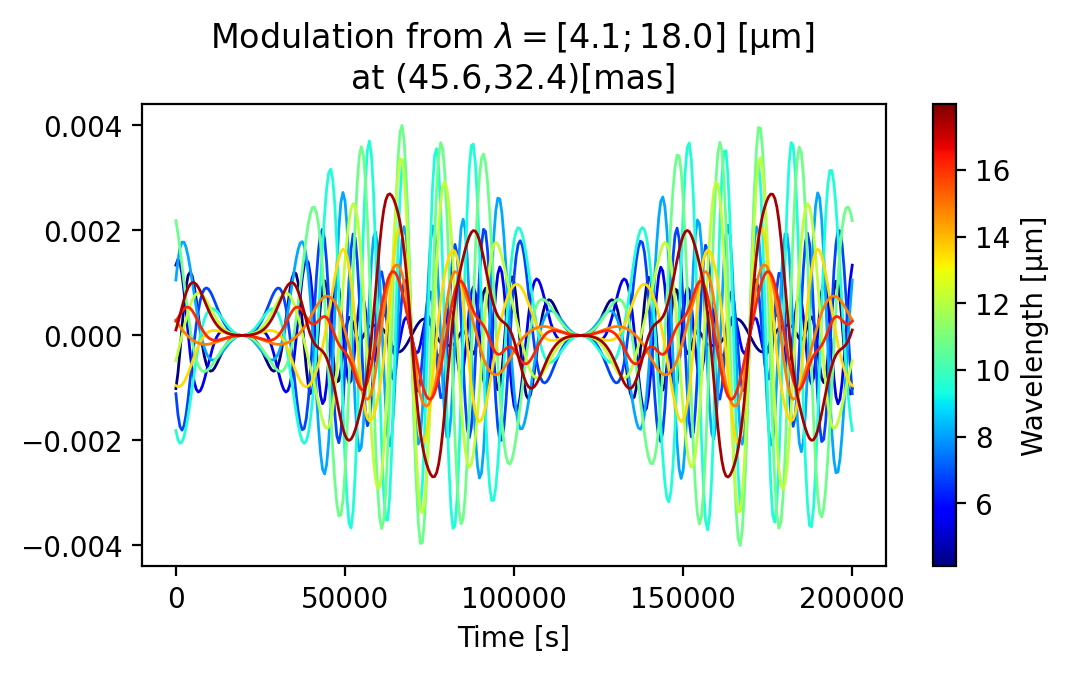

In [101]:
lambs = abe.nifits.oi_wavelength.lambs
cm = plt.matplotlib.cm.jet
colors = [cm(i/lambs.shape[0]) for i, awl in enumerate(lambs)]
norm = plt.matplotlib.colors.Normalize(vmin=1e6*lambs[0], vmax=1e6*lambs[-1])
idx = 50
aloc = (acollec.coords[0][idx], acollec.coords[1][idx])
fig = plt.figure(dpi=200, figsize=(6,3))
for i, awl in enumerate(lambs):
    if i in np.arange(len(lambs))[::3]:
        plt.plot(abe.nifits.ni_mod.data_table["TIME"], z_w[:,i,idx],
                 color=colors[i], alpha=1.0, linewidth=1.0)

plt.title(f"Modulation from $\\lambda = [{1e6*lambs[0]:.1f} ; {1e6*lambs[-1]:.1f}]$ [µm] \nat ({aloc[0]:.1f},{aloc[1]:.1f})[mas]")
plt.colorbar(plt.matplotlib.cm.ScalarMappable(norm=norm, cmap=cm, ),
             ax=fig.axes[0],
             orientation="vertical", label="Wavelength [µm]")
plt.xlabel(f"Time [s]")
plt.show()

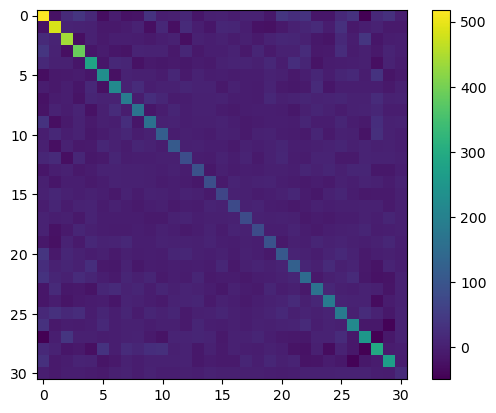

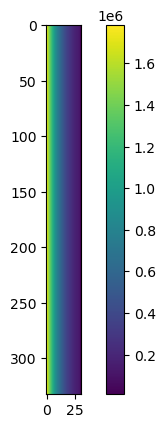

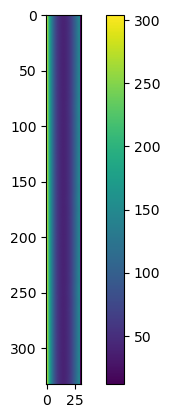

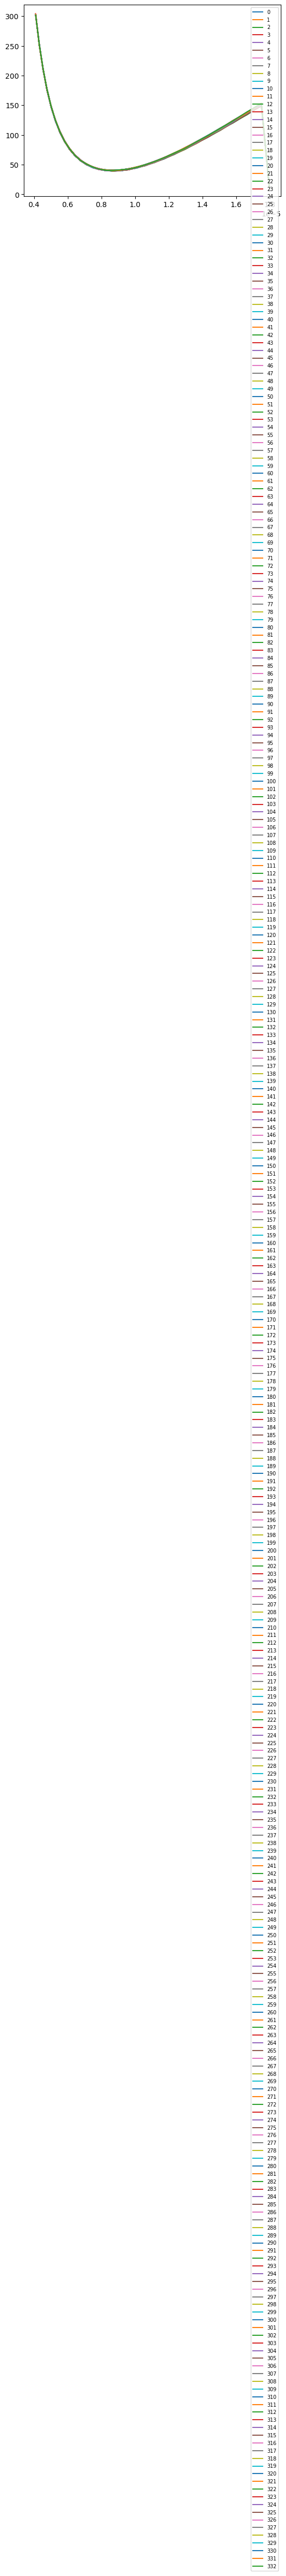

In [102]:
plt.figure()
plt.imshow(new_nifits.ni_kcov.data_array[0] )
plt.colorbar()
plt.figure()
plt.imshow(new_nifits.ni_iout.data_table["value"][:,:,1])
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(new_nifits.ni_iout.data_table["value"][:,:,2])
plt.colorbar()
plt.show()

plt.figure()
for i, anout in enumerate(new_nifits.ni_iout.data_table["value"][:,:,2]):
    plt.plot(new_nifits.oi_wavelength.lambs, anout, label=str(i))
plt.legend(fontsize=7)

<timed exec>:8: RuntimeWarning: invalid value encountered in divide


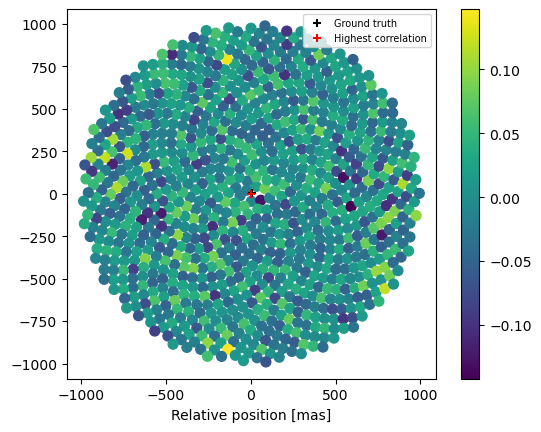

CPU times: user 2.91 s, sys: 3.68 s, total: 6.59 s
Wall time: 5.2 s


In [103]:
%%time
acollec = be.PointCollection.from_uniform_disk(1000., 1000, md=np)
z = abe.w_get_all_outs(*acollec.coords_rad, kernels=True)

from einops import rearrange
rez = rearrange(z, "times wlout point ->  point (times wlout)")
rek = rearrange(abe.nifits.ni_kiout.w_kiout(), "times wl out -> (times wl out)")

newcorrel = rez.dot(rek)/np.linalg.norm(rez, axis=1)
id_max = np.argmax(newcorrel)
cps = 8.*np.exp(1j*(np.pi/2 - np.deg2rad(60.)))

plt.figure()
plt.scatter(*acollec.coords, c=newcorrel, s=50)
plt.gca().set_aspect("equal")
plt.colorbar()
plt.scatter(cps.real, cps.imag, color="k", marker="+", label="Ground truth")
plt.scatter(acollec.coords[0][id_max], acollec.coords[1][id_max], color="r", marker="+", label="Highest correlation")
plt.legend(fontsize=7)
plt.xlabel("Relative position [mas]")
plt.show()

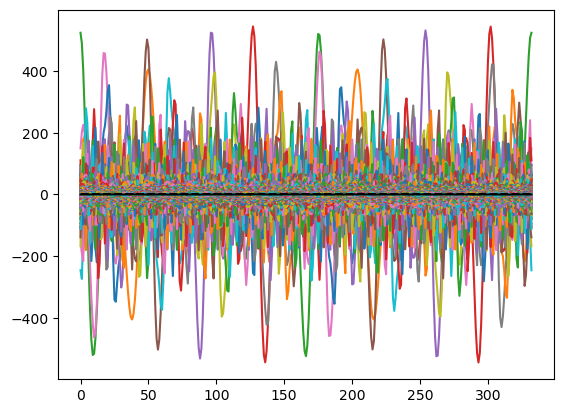

In [104]:

plt.figure()
for i in range(z.shape[-1]):
    plt.plot(np.sum(10000*z[:, :,i], axis=1))
plt.plot(np.sum(abe.nifits.ni_kiout.w_kiout()[:,:,0], axis=1), color="k")
plt.plot(np.sum(10000*z[:, :, id_max], axis=1), color="k", linestyle="--")
plt.show()

<timed exec>:8: RuntimeWarning: invalid value encountered in divide


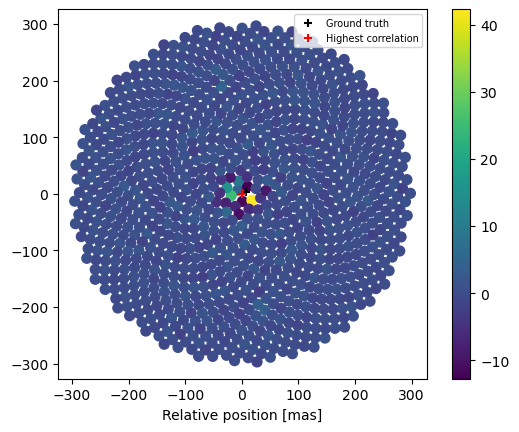

CPU times: user 2.7 s, sys: 2.47 s, total: 5.17 s
Wall time: 3.46 s


In [90]:
%%time
acollec = be.PointCollection.from_uniform_disk(300., 1000, md=np)
z = oldbe.get_all_outs(*acollec.coords_rad, kernels=True)

from einops import rearrange
rez = rearrange(z, "times wl out point ->  point (times wl out)")
rek = rearrange(oldbe.nifits.ni_kiout.kiout, "times wl out -> (times wl out)")

correl = rez.dot(rek)/np.linalg.norm(rez, axis=1)
id_max = np.argmax(correl)
cps = 8.*np.exp(1j*(np.pi/2 - np.deg2rad(60.)))

plt.figure()
plt.scatter(*acollec.coords, c=correl, s=50)
plt.gca().set_aspect("equal")
plt.colorbar()
plt.scatter(cps.real, cps.imag, color="k", marker="+", label="Ground truth")
plt.scatter(acollec.coords[0][id_max], acollec.coords[1][id_max], color="r", marker="+", label="Highest correlation")
plt.legend(fontsize=7)
plt.xlabel("Relative position [mas]")
plt.show()

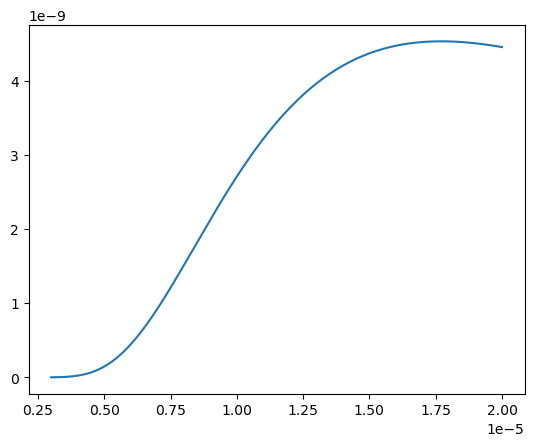

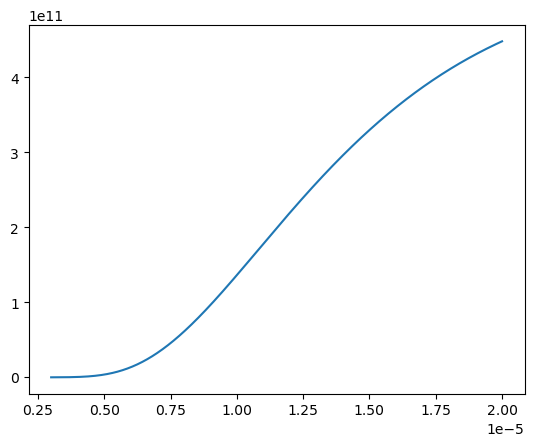

erg / (Hz s sr cm2)
erg / (Hz J s sr cm2)


In [91]:
from astropy.modeling.models import BlackBody as BB
import astropy.units as units
import astropy.constants as cst

Jy2ergscmhz = 1e-23*units.erg/(units.s * units.cm**2 * units.Hz) /units.Jy
ergscmhz2Jy = 1/Jy2ergscmhz


abb = BB(temperature=288*units.K)
wav = (np.linspace(3.0e-6, 20.0e-6, 1000)*units.m)
Bs = abb(wav)# .to(units.J/(units.Hz * units.s * units.sr * units.m**2))

def e2ph(energy, wl):
    nu = cst.c / wl
    ephot = cst.h * nu
    nphot = energy/ephot
    return nphot

def ph2e(nphot, wl):
    nu = cst.c / wl
    ephot = cst.h * nu
    energy = nhot/ephot
    return energy


plt.figure()
plt.plot(wav, Bs)
plt.show()

plt.figure()
plt.plot(wav, e2ph(Bs, wav))
plt.show()
    
print(Bs.unit)
print(e2ph(Bs, wav).unit)

In [92]:
# newcorrel - correl

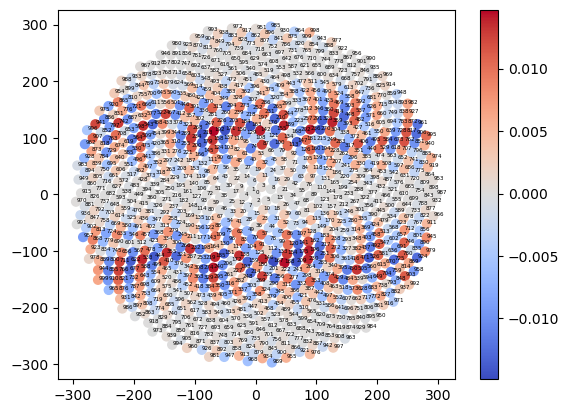

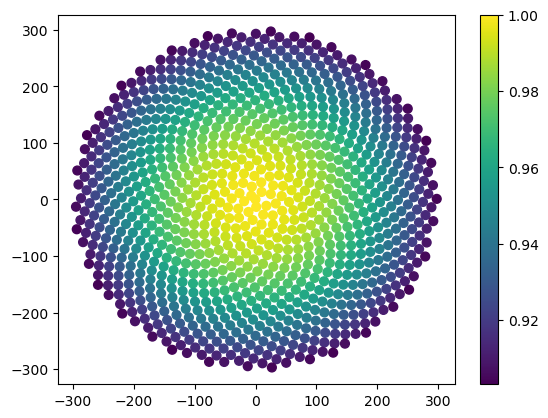

0.014920568786422339


In [93]:

offset = 0.5
plt.figure()
plt.scatter(*acollec.coords, c=z[0,-1,0,:], cmap="coolwarm", s=40)
plt.colorbar()
for i, (ax, ay) in enumerate(zip(*acollec.coords)):
    # print(i, ax,ay)
    plt.text(ax+offset, ay+offset, s=str(i), fontsize=4)
plt.show()

x_inj = abe.nifits.ni_fov.xy2phasor(*acollec.coords_rad)
plt.figure()
plt.scatter(*acollec.coords, c=np.abs(x_inj[0,-1,:]), cmap="viridis", s=40)
plt.colorbar()
plt.show()
print(np.max(z))


# Testing the sensitivity tools
## Important notice on units:
For a given $[a]$, the consistent unit of the covariance matrix should be $[a^2]$. Therefore since the collection map is in $[m^2]$, the whitened collection map is $[m^2 a^{-1}]$.

For creating sensitivity map, we create reference spectrum density for a given temperature for our given spectral bins. This is initially $[erg.Hz^{-1}.s^{-1}.sr^{-1}.cm^{-2}]$ which can be converted to the native $[ph.s^{-1}.sr^{-1}.m^{-2}]$. This has then to pass through our whitened collection map giving after the appropriate conversion from $[ph.s^{-1}]$ to $[a]$, leads to a solid angle $[sr]$.

The sensitivity routine then adjusts a scaling until it reaches detectability.

In the context of 

In [94]:
abe.add_blackbody(300*units.K)
abbcol = abe.get_blackbody_collected(*acollec.coords_rad, whiten=False, to_si=False)
abbcol.unit

erg ph / (J s sr cm2)


Unit("ph / (s sr)")

erg ph / (J s sr cm2)
Ref spectrum unit:  
Ref signal (x) unit:  
Ref signal (x) shape:  (10323, 1000)


/lhome/romain/miniconda3/envs/aiitec-jax/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


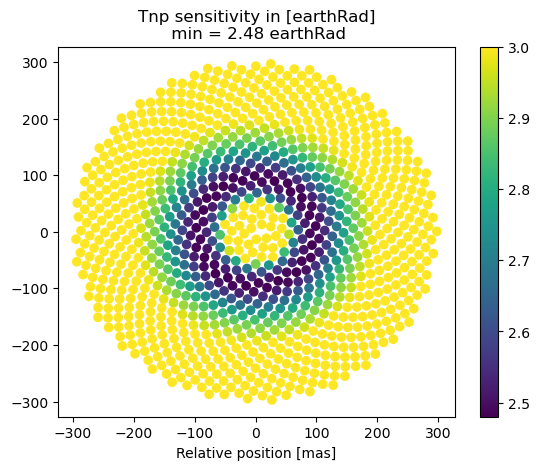

erg ph / (J s sr cm2)
Ref spectrum unit:  1 / rad2
Ref signal (x) unit:  1 / rad2
Ref signal (x) shape:  (10323, 1000)


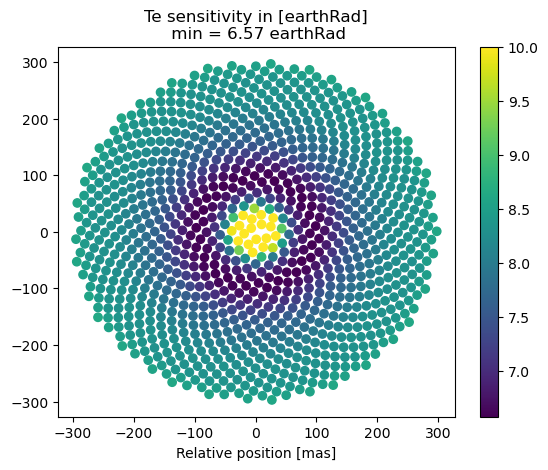

In [95]:
# z = abe.w_get_all_outs(*acollec.coords_rad, kernels=True)
sen_rjup = abe.get_sensitivity_tnp(*acollec.coords_rad, temperature=300.*units.K, distance=10*units.pc,
                                 radius_unit=units.Rearth)
plt.figure()
plt.scatter(*acollec.coords, c=sen_rjup.value, vmax=3.0)
plt.colorbar()
plt.xlabel("Relative position [mas]")
plt.title(f"Tnp sensitivity in [{sen_rjup.unit}]\n min = {np.min(sen_rjup):.2f}")
plt.show()
sen_rjup_te = abe.get_sensitivity_te(*acollec.coords_rad, temperature=300.*units.K, distance=10*units.pc,
                                 radius_unit=units.Rearth)
plt.figure()
plt.scatter(*acollec.coords, c=sen_rjup_te.value, vmax=10.0)
plt.colorbar()
plt.xlabel("Relative position [mas]")
plt.title(f"Te sensitivity in [{sen_rjup_te.unit}]\n min = {np.min(sen_rjup_te):.2f}")
plt.show()

erg ph / (J s sr cm2)
Ref spectrum unit:  1 / rad2
Ref signal (x) unit:  1 / rad2
Ref signal (x) shape:  (10323, 1000)


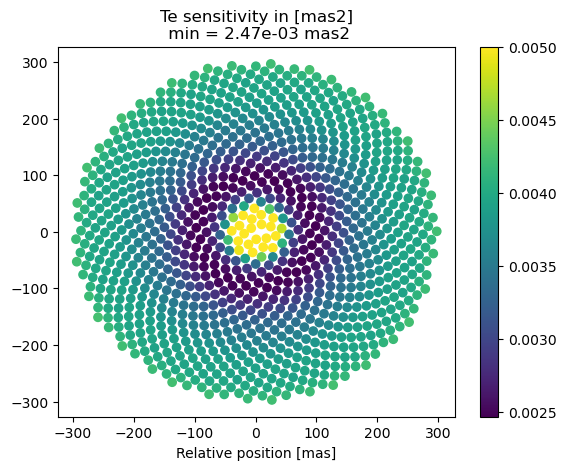

In [96]:
sen_rad = abe.get_sensitivity_te(*acollec.coords_rad, temperature=300.*units.K)
sen_mas = sen_rad.to(units.mas**2, equivalencies=units.dimensionless_angles())
plt.figure()
plt.scatter(*acollec.coords, c=sen_mas.value, vmax=5e-3)
plt.colorbar()
plt.xlabel("Relative position [mas]")
plt.title(f"Te sensitivity in [{sen_mas.unit}]\n min = {np.min(sen_mas):.2e}")
plt.show()

In [23]:
abe.nifits.ni_fov.xy2phasor(*acollec.coords_rad).shape

(333, 31, 1000)

In [ ]:
# Flattened signal
x0 = bb288k_kiout_whitened.flatten()
x0Tx0 = x0.T.dot(x0)
sqrt_x0Tx0 = np.sqrt(x0Tx0)

# Define desired Pdet
Pdet_target = 0.90
Pfa = 0.046
xsi = sqrt_x0Tx0 * norm.ppf(1 - Pfa)

# Define residual function
def residual(alpha):
    xTx = (alpha**2) * x0Tx0
    Pdet = 1 - norm.cdf((xsi - xTx) / (alpha * sqrt_x0Tx0))
    return Pdet - Pdet_target

# Solve for scaling factor alpha
sol = root_scalar(residual, bracket=[1e-6, 10], method='brentq')
alpha_sol = sol.root
print(f"Scaling factor alpha for Pdet={Pdet_target}: {alpha_sol}")

# Scale the input signal if needed
x_planet_scaled = alpha_sol * x0

xTx_solution = x_planet_scaled.T @ x_planet_scaled
xsi = np.sqrt(xTx_solution) * norm.ppf(1 - Pfa)

# Plot the two distributions
z = np.linspace(-0.5*xTx_solution, 10*xsi, 1000)
zdet = z[z>xsi]
zndet = z[z<xsi]
fig = plt.figure(dpi=150)
plt.plot(z, norm.pdf(z, loc=0, scale=np.sqrt(xTx_solution)), label=f"Pdf($T_{{NP}} | \mathcal{{H}}_0$)")
plt.fill_between(zdet,  norm.pdf(zdet, loc=0, scale=np.sqrt(xTx_solution)), alpha=0.3, label=f"$P_{{FA}}$")# , hatch="//"
#plt.fill_between(z[], )
plt.plot(z, norm.pdf(z, loc=xTx_solution, scale=np.sqrt(xTx_solution)), label=f"Pdf($T_{{NP}}| \mathcal{{H}}_1$)")
plt.fill_between(zdet,  norm.pdf(zdet, loc=xTx_solution, scale=np.sqrt(xTx_solution)), alpha=0.3, label=f"$P_{{Det}}$")
plt.axvline(xsi, color="gray", linestyle="--",  label=f"$\\xi(P_{{FA}}={Pfa})$")
plt.xlabel(f"$T_{{NP}}$")
plt.ylabel(f"$PDF(T_{{NP}})$")
plt.legend()
plt.show()

In [41]:
abe.nifits.ni_mod.data_table

<Table length=333>
      TIME           INT_TIME    ... FOV_INDEX
    float64          float64     ...   int32  
---------------- --------------- ... ---------
             0.0 602.40966796875 ...         1
 602.40966796875 602.40966796875 ...         1
 1204.8193359375 602.40966796875 ...         1
1807.22900390625 602.40966796875 ...         1
  2409.638671875 602.40966796875 ...         1
3012.04833984375 602.40966796875 ...         1
 3614.4580078125 602.40966796875 ...         1
4216.86767578125 602.40966796875 ...         1
   4819.27734375 602.40966796875 ...         1
             ...             ... ...       ...
     194578.3125       602.40625 ...         1
    195180.71875       602.40625 ...         1
      195783.125     602.4140625 ...         1
   196385.546875     602.4140625 ...         1
   196987.953125       602.40625 ...         1
   197590.359375       602.40625 ...         1
   198192.765625     602.4140625 ...         1
     198795.1875     602.4140625 ...         1
    199397.59375       602.40625 ...         1
        200000.0       602.40625 ...         1

import astropy.units as u
a = abe.get_blackbody_native_detailed(verbose=True)
print(a.unit)
dlambs = abe.nifits.oi_wavelength.dlambs
lambs = abe.nifits.oi_wavelength.lambs
solidangle = (np.pi*cst.R_earth**2 / ((10*u.pc).to(u.m))**2).to(u.sr, equivalencies=u.dimensionless_angles())
a_thermal_lobe = [(ana/(adlamb*u.m)).to(u.erg/(u.s*u.sr*u.cm**2*u.micron), equivalencies=u.spectral_density(alamb*u.m)) \
                             for ana, alamb, adlamb in zip(a, lambs, dlambs)]
theu = a_thermal_lobe[0].unit
a_thermal_lobe = np.array([aval.value for aval in a_thermal_lobe])*theu
del theu
a_thermal_lobe *= solidangle
# a_thermal_lobe *= solidangle

In [17]:
rawbb = (abe.bb(lambs*u.m) * solidangle)
a_direct_bb = [arawbb.to(u.erg/(u.cm**2 * u.s * u.micron), equivalencies=u.spectral_density(alamb*u.m))\
                         for arawbb, alamb in zip(rawbb, lambs)]
theunit = a_direct_bb[0].unit
a_direct_bb = np.array([aval.value for aval in a_direct_bb])*theunit

lambsun = np.logspace(-7, -4, 1000)
solidangle_sun = (np.pi*cst.R_sun**2 / ((10*u.pc).to(u.m))**2).to(u.sr, equivalencies=u.dimensionless_angles())
sunbb_ = nifits.extra.BB(temperature=5700*u.K)
sunbb = sunbb_(lambsun*u.m) * solidangle_sun
a_sun_bb = [asunbb.to(u.erg/(u.cm**2 * u.s * u.micron), equivalencies=u.spectral_density(alamb*u.m))\
                         for asunbb, alamb in zip(sunbb, lambsun)]
theu = a_sun_bb[0].unit
a_sun_bb = np.array([aval.value for aval in a_sun_bb])*theu

NameError: name 'lambs' is not defined

In [18]:
plt.figure()
plt.plot(lambs, a_thermal_lobe)
plt.plot(lambs, a_direct_bb)
plt.plot(lambsun, a_sun_bb)
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e-7, 100e-6)
plt.ylim(1e-20, 1e-6)
plt.ylabel(a_thermal_lobe.unit.to_string())
plt.xlabel(f"$\\lambda$ [m]")
plt.show()

NameError: name 'lambs' is not defined

<Figure size 640x480 with 0 Axes>

In [16]:
import zodiax as zdx
from jax import numpy as jp, scipy as jscp

In [17]:
import equinox as eqx
from typing import Union, Callable, List
from functools import wraps
from jaxtyping import PyTree

In [18]:
import dnull as dn

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [19]:
import numpy as np
import nifits
import nifits.io.oifits as io
import nifits.backend as be
import nifits.extra as extra

import matplotlib.pyplot as plt



In [20]:
new_nifits = io.nifits.from_nifits("space_linear_B_4.nifits")
oldbe = be.NI_Backend(new_nifits)
oldbe.create_fov_function_all()
abe = extra.Post(new_nifits)
abe.create_fov_function_all()
abe.create_whitening_matrix(replace=False)

/home/romain/Documents/hi5/aiitec/nifits/nifits/nifits/io/oifits.py:73: UserWarning: Keyword deprecation. Expected `NIFITS FOV_MODE` (`HIERARCH` keyword)
 Found `FOV_MODE`
 This file was generated for NIFITS standard version <= 0.2. It will stop working for library versions >= 0.1.0 .
  warnings.warn(f"Keyword deprecation. Expected `{args[1]}` (`HIERARCH` keyword)\n Found `{mykw}`\n This file was generated for NIFITS standard version <= 0.2. It will stop working for library versions >= 0.1.0 .")
/home/romain/Documents/hi5/aiitec/nifits/nifits/nifits/io/oifits.py:73: UserWarning: Keyword deprecation. Expected `NIFITS FOV_TELDIAM` (`HIERARCH` keyword)
 Found `FOV_TELDIAM`
 This file was generated for NIFITS standard version <= 0.2. It will stop working for library versions >= 0.1.0 .
  warnings.warn(f"Keyword deprecation. Expected `{args[1]}` (`HIERARCH` keyword)\n Found `{mykw}`\n This file was generated for NIFITS standard version <= 0.2. It will stop working for library versions >= 0.

Missing OI_ARRAY
Missing NI_DSAMP
Missing NI_OSWAVELENGTH
Missing NI_IOTAGS
Checking header True
contains_header: True


In [21]:
mydn = dn.dnull.DN_NIFITS.from_nifits(new_nifits)

ni_catm dn_catm
ni_fov dn_fov
Triggering dn_fov
ni_kmat dn_kmat
oi_wavelength dn_wavelength
ni_mod dn_mod
ni_iout dn_iout
ni_kiout dn_kiout
ni_kcov dn_kcov
{'dn_catm': DN_CATM(M=DN_CPX(real=f32[60,4,4], imag=f32[60,4,4])), 'dn_fov': DN_FOV_diam_gau_rad(D=f32[], offset=f32[62,60,2]), 'dn_kmat': DN_KMAT(K=f32[1,4]), 'dn_wavelength': DN_WAVELENGTH(lambs=f32[60], name='OI_WAVELENGTH'), 'dn_mod': DN_MOD(
  time=f32[62],
  int_time=f32[62],
  mod_phas=DN_CPX(real=f32[62,60,4], imag=f32[62,60,4]),
  app_xy=f32[62,4,2],
  arrcol=f32[62,4],
  fov_index=i32[62]
), 'dn_iout': DN_IOUT(iout=f32[62,60,4], unit=Unit("ph / s")), 'dn_kiout': DN_KIOUT(kiout=f32[62,60,1], unit=Unit("ph / s")), 'dn_kcov': DN_KCOV(kcov=f32[62,60,60], unit=Unit("ph2 / s2"))}


In [22]:
%%time
acollec = be.PointCollection.from_uniform_disk(750., 1000,)
z_w = mydn.w_get_all_outs(*acollec.coords_rad, kernels=True)

AttributeError: 'DN_NIFITS' object has no attribute 'w_get_all_outs'

IndexError: index 31 is out of bounds for axis 1 with size 31

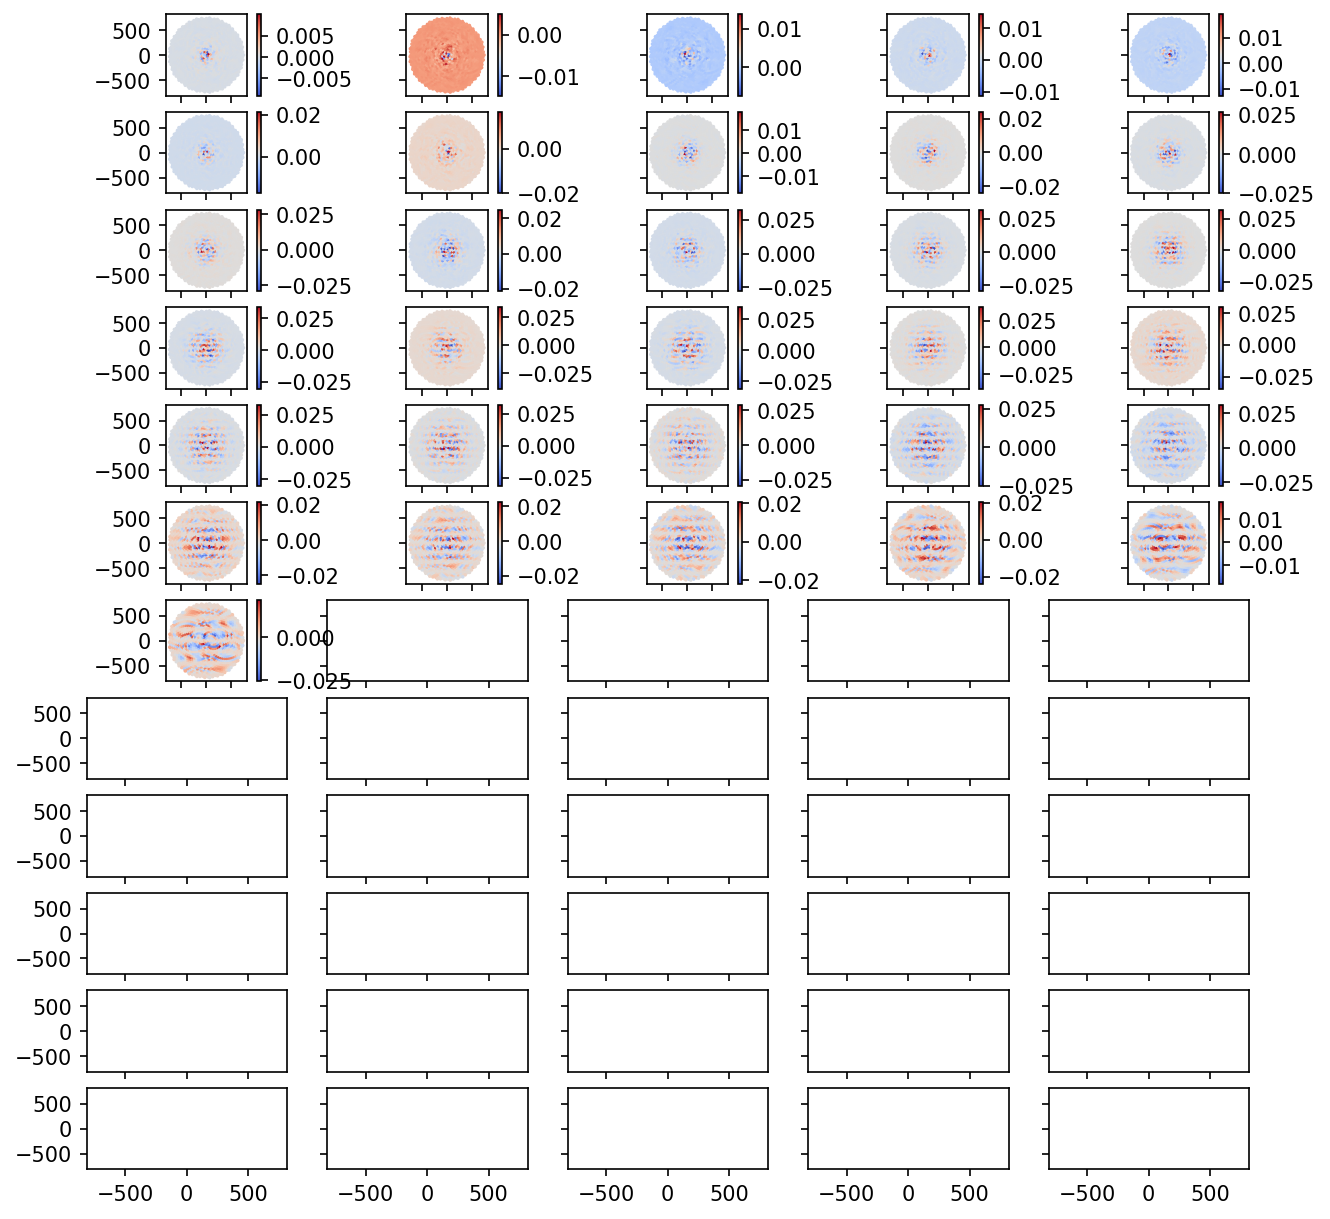

In [23]:
nwl = len(abe.nifits.oi_wavelength.lambs)
fig, axs = plt.subplots(nwl//5,5, figsize=(10,10), sharex=True, sharey=True, dpi=150)
for i in range(nwl):
    plt.sca(axs.flat[i])
    plt.scatter(*acollec.coords, c=z_w[0,i,:], cmap="coolwarm", s=0.5)
    plt.gca().set_aspect("equal")
    plt.colorbar()
plt.show()

for i in range(2):
    plt.figure()
    plt.scatter(*acollec.coords, c=z_w[0,i,:], cmap="coolwarm", s=40)
    plt.colorbar()
    plt.show()


x_inj = abe.nifits.ni_fov.xy2phasor(*acollec.coords_rad)
plt.figure()
plt.scatter(*acollec.coords, c=np.abs(x_inj[0,-1,:]), cmap="viridis", s=40)
plt.colorbar()
plt.show()
print(np.max(z_w))
